#The car evaluation dataset is collected from UCI Machine Learning Repository and the data source (creator) was Marko Bohanec [1]. It contains 1728 car sample information with 7 attributes, including one class feature that tells whether the car is in acceptable conditions. The feature names with their descriptions are listed following:

buying_price: Buying Level or Capacity of the customer (Very High: vhigh, High: high, Low: low, Medium: med)
maint_cost: Maintenence Level (Very High: vhigh, High: high, Low: low, Medium: med)
doors: Number of doors in the car (2, 3, 4, and 5 or more)
person_capacity: capacity in terms of persons to carry (2, 4, and more)
lug_boot: The size of the Luggage Boot (small, med, big)
safety: Safety Level of Car (high, med, low)
class: Unacceptable, Acceptable, VeryGood, Good

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [9]:
import os

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
os.chdir("/content/drive/MyDrive/Machine_Learning")

In [12]:
df = pd.read_csv("21-01-2023_Part-1_Machine_Learning_car_evaluation_DAY-10_PGA15.csv")

In [13]:
df

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1728 non-null   object
 1   maintenance cost   1728 non-null   object
 2   number of doors    1728 non-null   object
 3   number of persons  1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [15]:
X = df.drop(['decision'], axis=1)

y = df['decision']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [17]:
df.columns

Index(['buying price', 'maintenance cost', 'number of doors',
       'number of persons', 'lug_boot', 'safety', 'decision'],
      dtype='object')

In [18]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 8.6 MB/s eta 0:00:00


In [19]:
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying price', 'maintenance cost', 'number of doors', 'number of persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [20]:
X_train

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety
1475,1,1,1,1,1,1
1630,1,2,2,1,2,2
840,2,2,3,2,3,3
881,3,3,2,1,1,1
1153,3,4,1,3,2,2
...,...,...,...,...,...,...
764,2,2,2,2,1,1
1562,1,4,4,3,3,1
429,4,2,3,3,1,3
965,3,3,3,3,2,1


## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [21]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [22]:
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [24]:
predictions = dtree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         acc       0.83      0.75      0.79       124
        good       0.50      0.64      0.56        22
       unacc       0.95      0.97      0.96       406
       vgood       0.81      0.68      0.74        19

    accuracy                           0.90       571
   macro avg       0.77      0.76      0.76       571
weighted avg       0.90      0.90      0.90       571



In [27]:
print(confusion_matrix(y_test,predictions))

[[ 93  10  20   1]
 [  5  14   1   2]
 [ 12   0 394   0]
 [  2   4   0  13]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(n_estimators=600)

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [31]:
predictions = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         acc       0.69      0.77      0.73       124
        good       0.50      0.32      0.39        22
       unacc       0.94      0.95      0.95       406
       vgood       1.00      0.26      0.42        19

    accuracy                           0.87       571
   macro avg       0.78      0.58      0.62       571
weighted avg       0.87      0.87      0.86       571



**Show the Confusion Matrix for the predictions.**

In [34]:
print(confusion_matrix(y_test,predictions))

[[ 96   4  24   0]
 [ 14   7   1   0]
 [ 19   0 387   0]
 [ 11   3   0   5]]


[Text(0.625, 0.875, 'X[5] <= 2.5\ngini = 0.463\nsamples = 1157\nvalue = [260, 47, 804, 46]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\ngini = 0.584\nsamples = 774\nvalue = [260, 47, 421, 46]'),
 Text(0.25, 0.375, 'X[0] <= 3.5\ngini = 0.618\nsamples = 255\nvalue = [132, 22, 81, 20]'),
 Text(0.125, 0.125, 'gini = 0.604\nsamples = 192\nvalue = [110, 22, 40, 20]'),
 Text(0.375, 0.125, 'gini = 0.455\nsamples = 63\nvalue = [22, 0, 41, 0]'),
 Text(0.75, 0.375, 'X[3] <= 2.5\ngini = 0.505\nsamples = 519\nvalue = [128, 25, 340, 26]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 258\nvalue = [0, 0, 258, 0]'),
 Text(0.875, 0.125, 'gini = 0.642\nsamples = 261\nvalue = [128, 25, 82, 26]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 383\nvalue = [0, 0, 383, 0]')]

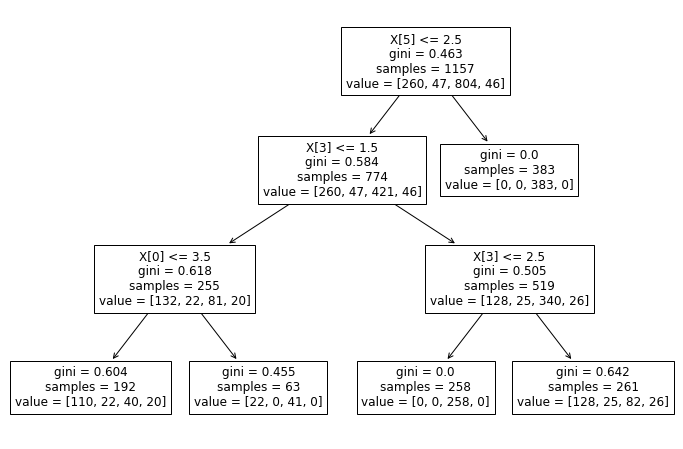

In [35]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [36]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data) 
graph

KeyError: ignored

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph